## Estudio del sistemas de ecuaciones diferenciales epidemiológico SIR y ajuste de este modelo para los datos de la provincia de Hubei frente al Covid 19

![Modelo SIR](asd.jpeg)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import itertools

## Implementación de los métodos

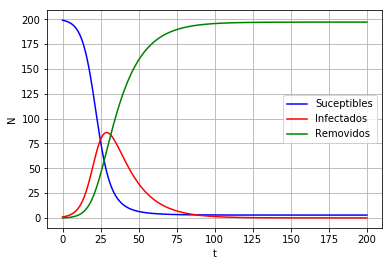

In [11]:
N = 200 # Total population

# Initial conditions 

Se = [199] # Susceptible population
Ie = [1] #   Infected population 
Re = [0] #   Removed population
t = [0]

# Parameters

beta = 0.3
gama = 0.07

# Euler method
h = 0.1

def f(S,I,N,beta,gama,j):
    
    if j == 1 :
        return (-beta*I*S/N)
    
    if j == 2 :
        return ((beta*I*S/N) - gama*I)
    
    if j == 3 :
        return (gama*I)
    
for i in range(1999):  
    Se.append(Se[i] + h*f(Se[i],Ie[i],N,beta,gama,1))
    Ie.append(Ie[i] + h*f(Se[i],Ie[i],N,beta,gama,2))
    Re.append(Re[i] + h*f(Se[i],Ie[i],N,beta,gama,3))
    t.append((i+1)*h)

    
plt.plot(t,Se,color='b' ,label = 'Suceptibles')
plt.plot(t,Ie,'r',label = 'Infectados')
plt.plot(t,Re,'g',label = 'Removidos')
plt.xlabel('t')
plt.ylabel('N')
plt.grid()
plt.legend()
plt.show()


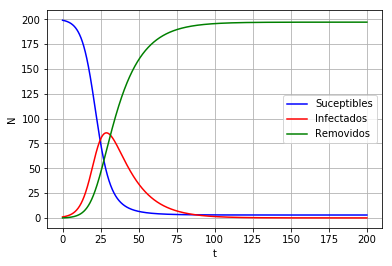

In [13]:
N = 200 # Total population

# Parameters
beta = 0.3
gama = 0.07

# Initial conditions
ydumb = np.zeros(3); y = np.zeros (3); fReturn = np.zeros (3)
y[0] = 199.;   y[1] = 1.; y[2] = 0.;   t = 0;   h = 0.1
Sr = [y[0]];     Ir = [y[1]]; Rr = [y[2]];   tiempo = [t]


# Runge kutta method

def f(t, y,N,beta,gama, fReturn):        
   
    fReturn[0] = -beta*y[1]*y[0]/N
    fReturn[1] = (beta*y[1]*y[0]/N) - gama*y[1] # 2nd sprint .
    fReturn[2] = (gama*y[1])
     
k1 = np.zeros(3)
k2 = np.zeros(3)
k3 = np.zeros(3)
k4 = np.zeros(3)

for i in range(1999):
    
    f(t, y,N,beta,gama, fReturn)
    
    k1[0] = h*fReturn[0]; k1[1] = h*fReturn[1]; k1[2] = h*fReturn[2]
    for j in range(0,3): ydumb[j] = y[j] + k1[j]/2.
        
    f(t + h/2., ydumb,N,beta,gama, fReturn)
    
    k2[0] = h*fReturn[0]; k2[1] = h*fReturn[1]; k2[2] = h*fReturn[2] 
    for j in range(0,3): ydumb[j] = y[j] + k2[j]/2.
        
    f(t + h/2., ydumb,N,beta,gama, fReturn)
    
    k3[0] = h*fReturn[0]; k3[1] = h*fReturn[1]; k3[2] = h*fReturn[2]
    for j in range(0,3): ydumb[j] = y[j] + k3[j]
        
    f(t + h, ydumb,N,beta,gama, fReturn)
    
    k4[0] = h*fReturn[0]; k4[1] = h*fReturn[1]; k4[2] = h*fReturn[2]
    for j in range(0,3): y[j] = y[j] + (k1[j] + 2.*(k2[j] + k3[j]) + k4[j])/6.
    
    t = (i+1)*h
    tiempo = np.append(tiempo, t)
    Sr = np.append(Sr, y[0]) 
    Ir = np.append(Ir, y[1])
    Rr = np.append(Rr, y[2])
    
plt.plot(tiempo, Sr,'b',label = 'Suceptibles')
plt.plot(tiempo, Ir,'r',label = 'Infectados')
plt.plot(tiempo, Rr,'g',label = 'Removidos')
plt.xlabel('t')
plt.ylabel('N')
plt.grid()
plt.legend()
plt.show()

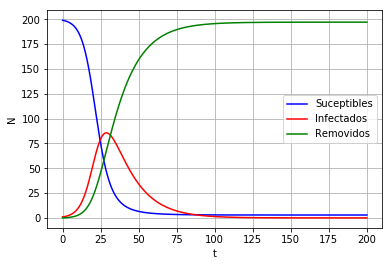

In [14]:
# Parameters
N = 200
beta = 0.3
gama = 0.07

# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y0 = [199, 1, 0] # Initial conditions

#y0 = [N - 399 - 45, 399,45]

t = np.linspace(0, 200, 2000) # Step

sol = odeint(f, y0, t, args=(N,beta,gama)) # Solution

plt.plot(t, sol[:, 0], 'b',label = 'Suceptibles')
plt.plot(t, sol[:, 1], 'r',label = 'Infectados')
plt.plot(t, sol[:, 2], 'g',label = 'Removidos')
plt.xlabel('t')
plt.ylabel('N')
plt.grid()
plt.legend()
plt.show()

## Comparación de los métodos

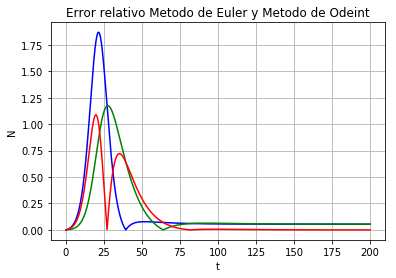

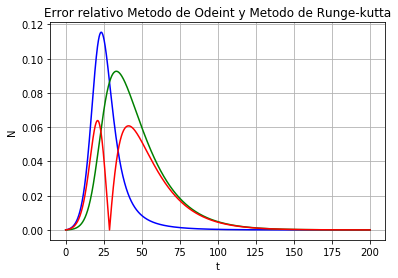

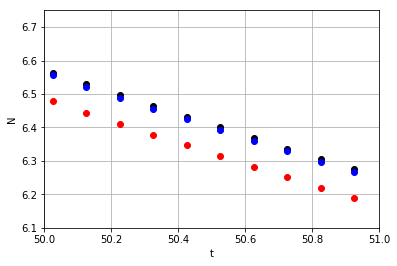

In [49]:
# Relative error Euler and Odeint

ErrS = np.abs((Se-sol[:, 0]))
ErrI = np.abs((Ie-sol[:, 1]))
ErrR = np.abs((Re-sol[:, 2]))

plt.plot(t,ErrS,'b')
plt.plot(t,ErrR,'g')
plt.plot(t,ErrI,'r')
plt.xlabel('t')
plt.ylabel('N')
plt.title('Error relativo Metodo de Euler y Metodo de Odeint')
plt.grid()
plt.show()

# Relative error Runge kutta and Odeint

ErrS = np.abs((Sr-sol[:, 0]))
ErrI = np.abs((Ir-sol[:, 1]))
ErrR = np.abs((Rr-sol[:, 2]))

plt.plot(t,ErrS,'b')
plt.plot(t,ErrR,'g')
plt.plot(t,ErrI,'r')
plt.xlabel('t')
plt.ylabel('N')
plt.title('Error relativo Metodo de Odeint y Metodo de Runge-kutta')
plt.grid()
plt.show()

plt.plot(t,Se,'o',color='r')
plt.plot(t,Sr,'o',color='black')
plt.plot(t, sol[:, 0], 'o',color='b')
plt.xlim(50,51)
plt.ylim(6.1,6.75)
plt.xlabel('t')
plt.ylabel('N')
plt.grid()
plt.show()

## Convergencia de las soluciones

In [16]:
N = 200 # Total population

# Initial conditions 


Se = [199] # Susceptible population
Ie = [1] #   Infected population 
Re = [0] #   Removed population
t = [0]
Nt =[200]

y0 = [199, 1, 0] # Initial conditions

# Initial conditions


# Parameters

beta = 0.3
gama = 0.2

# Euler method
h = 0.1

h = [10,1,0.1,0.01,0.001]
n = [20,200,2000,20000,200000]


def f(S,I,N,beta,gama,j):
    
    if j == 1 :
        return (-beta*I*S/N)
    
    if j == 2 :
        return ((beta*I*S/N) - gama*I)
    
    if j == 3 :
        return (gama*I)
    
# Runge kutta method

def fr(tr, y,N,beta,gama, frReturn):        
   
    frReturn[0] = -beta*y[1]*y[0]/N
    frReturn[1] = (beta*y[1]*y[0]/N) - gama*y[1] # 2nd sprint .
    frReturn[2] = (gama*y[1])
     
k1 = np.zeros(3)
k2 = np.zeros(3)
k3 = np.zeros(3)
k4 = np.zeros(3)

    
# Odeint method
def ode(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y1_dif = []
y2_dif = []
y3_dif = []

y1r_dif = []
y2r_dif = []
y3r_dif = []

for k in h:
    v = h.index(k)
    xs = n[v]
    Se = [199]
    Ie = [1]
    Re = [0]
    ydumb = np.zeros(3)
    y = np.zeros (3)
    frReturn = np.zeros (3)
    y[0] = 199.
    y[1] = 1.
    y[2] = 0.
    tr = 0
    Sr = [y[0]]
    Ir = [y[1]]
    Rr = [y[2]]
    tiempo = [t]
    
    
    for i in range(0,xs):  
        Se.append(Se[i] + k*f(Se[i],Ie[i],N,beta,gama,1))
        Ie.append(Ie[i] + k*f(Se[i],Ie[i],N,beta,gama,2))
        Re.append(Re[i] + k*f(Se[i],Ie[i],N,beta,gama,3))
        t.append((i+1)*k)
    
        fr(tr, y,N,beta,gama, frReturn)
    
        k1[0] = k*frReturn[0]; k1[1] = k*frReturn[1]; k1[2] = k*frReturn[2]
        for j in range(0,3): ydumb[j] = y[j] + k1[j]/2.
        
        fr(tr + k/2., ydumb,N,beta,gama, frReturn)
    
        k2[0] = k*frReturn[0]; k2[1] = k*frReturn[1]; k2[2] = k*frReturn[2] 
        for j in range(0,3): ydumb[j] = y[j] + k2[j]/2.
        
        fr(tr + k/2., ydumb,N,beta,gama, frReturn)
    
        k3[0] = k*frReturn[0]; k3[1] = k*frReturn[1]; k3[2] = k*frReturn[2]
        for j in range(0,3): ydumb[j] = y[j] + k3[j]
        
        fr(tr + k, ydumb,N,beta,gama, fReturn)
    
        k4[0] = k*frReturn[0]; k4[1] = k*frReturn[1]; k4[2] = k*frReturn[2]
        for j in range(0,3): y[j] = y[j] + (k1[j] + 2.*(k2[j] + k3[j]) + k4[j])/6.
    
        tr = (i+1)*k
        tiempo = np.append(tiempo, tr)
        
        Sr = np.append(Sr, y[0]) 
        Ir = np.append(Ir, y[1])
        Rr = np.append(Rr, y[2])
         
        
    m = np.linspace(0, 200, n[v]+1) # Step
    sol = odeint(ode, y0, m, args=(N,beta,gama)) # Solution
    
    y1_dif.append(np.mean(np.abs(Se-sol[:,0])))
    y2_dif.append(np.mean(np.abs(Ie-sol[:,1])))
    y3_dif.append(np.mean(np.abs(Re-sol[:,2])))
    
    y1r_dif.append(np.mean(np.abs(Sr-sol[:,0])))
    y2r_dif.append(np.mean(np.abs(Ir-sol[:,1])))
    y3r_dif.append(np.mean(np.abs(Rr-sol[:,2])))
    

In [17]:
print(y1_dif, y2_dif, y3_dif) #Para las de euler
print('\n')
print(y1r_dif, y2r_dif, y3r_dif) #Para las de Runge-Kutta

([15.519252602395817, 1.296197435649296, 0.1274018299198047, 0.012718456695347741, 0.0012720814525263469], [1.3920391111149879, 0.12175176297306435, 0.012014298875385064, 0.0011998526394308515, 0.00012001120580315617], [15.824547035706402, 1.2941145038477235, 0.12713345195314624, 0.012691076392240918, 0.0012693233418745297])


([2.0494931938529093, 0.21171539463988973, 0.02119111421455222, 0.0021193640913023805, 0.00021239154575089796], [0.19750258663768136, 0.01971372152865588, 0.0019963480817854189, 0.00019995629033424565, 2.0040658500328875e-05], [2.0735041184124827, 0.21149619153746188, 0.021147709234573469, 0.002114814472955012, 0.00021191993332679698])


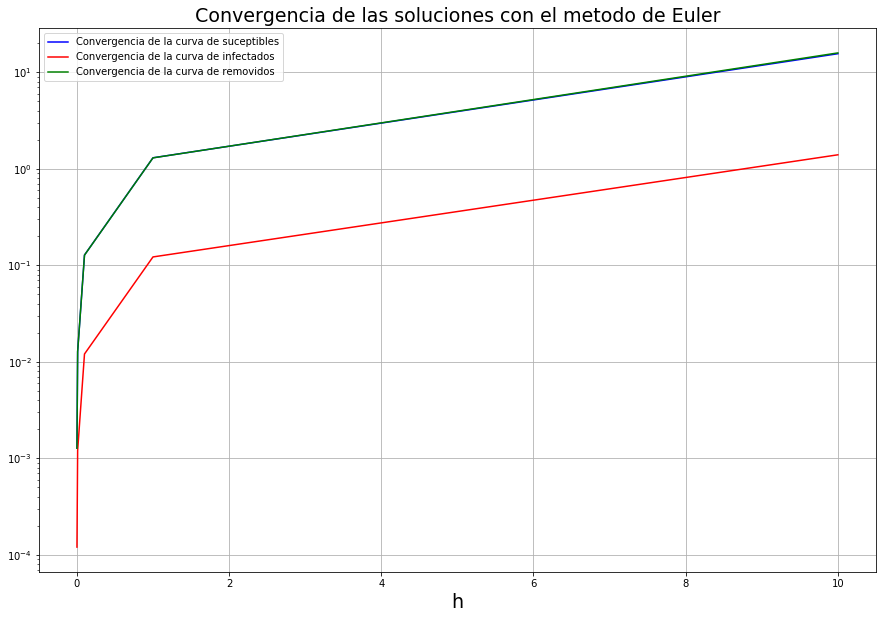

In [18]:
plt.figure(figsize=(15,10))
plt.title("Convergencia de las soluciones con el metodo de Euler", fontsize=19)
plt.semilogy(h, y1_dif,'b', label="Convergencia de la curva de suceptibles")
plt.semilogy(h, y2_dif,'r', label="Convergencia de la curva de infectados")
plt.semilogy(h, y3_dif,'g', label="Convergencia de la curva de removidos")
plt.xlabel('h', fontsize = 19)
plt.grid()
plt.legend()

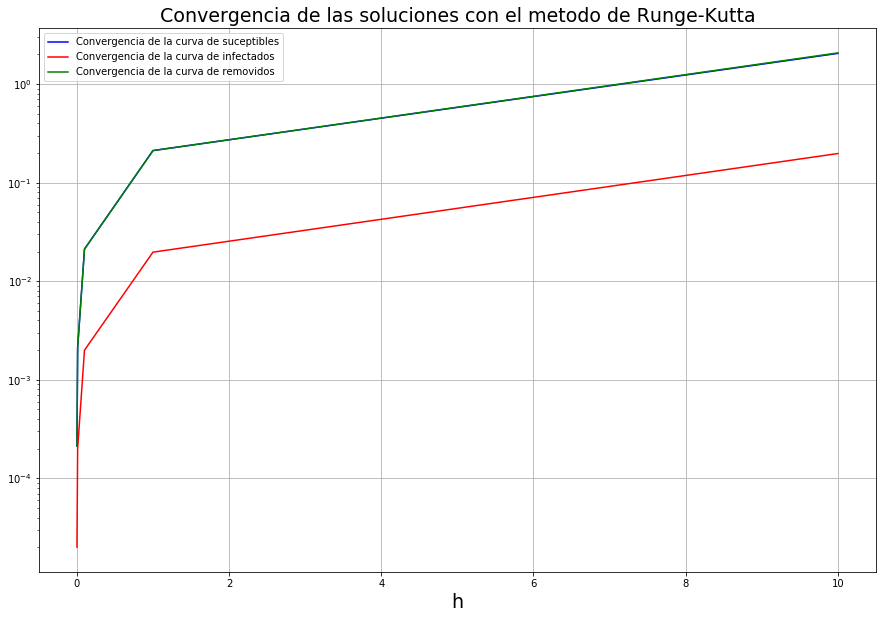

In [19]:
plt.figure(figsize=(15,10))
plt.title("Convergencia de las soluciones con el metodo de Runge-Kutta", fontsize=19)
plt.semilogy(h, y1r_dif,'b', label="Convergencia de la curva de suceptibles")
plt.semilogy(h, y2r_dif,'r', label="Convergencia de la curva de infectados")
plt.semilogy(h, y3r_dif,'g', label="Convergencia de la curva de removidos")
plt.xlabel('h', fontsize = 19)
plt.grid()
plt.legend()

Se tomaron como soluciones exactas las obtenidas con el método de ODEINT debido a su gran exactitud.
Se puede notar que la diferencia entre las soluciones obtenidas con el método de Euler y las soluciones exactas (ODEINT) es apreciablemente mayor a las diferencias obtenidas entre el método de Runge-Kutta y las soluciones exactas (ODEINT). Esto era de esperar debido a que el método de Runge-Kutta es más exacto al de Euler debido a su forma de implementación. 

Para valores de h muy pequeños, ambos metodos convergen a cero, el de Runge-Kutta converge de manera más rápida que el de Euler, pero para estos valores pequeños de h se puede usar el método de Euler sin perder mucha exactitud en las soluciones obtenidas.


## Comportamiento de la curva de infectados y recuperados respecto a los parámetros

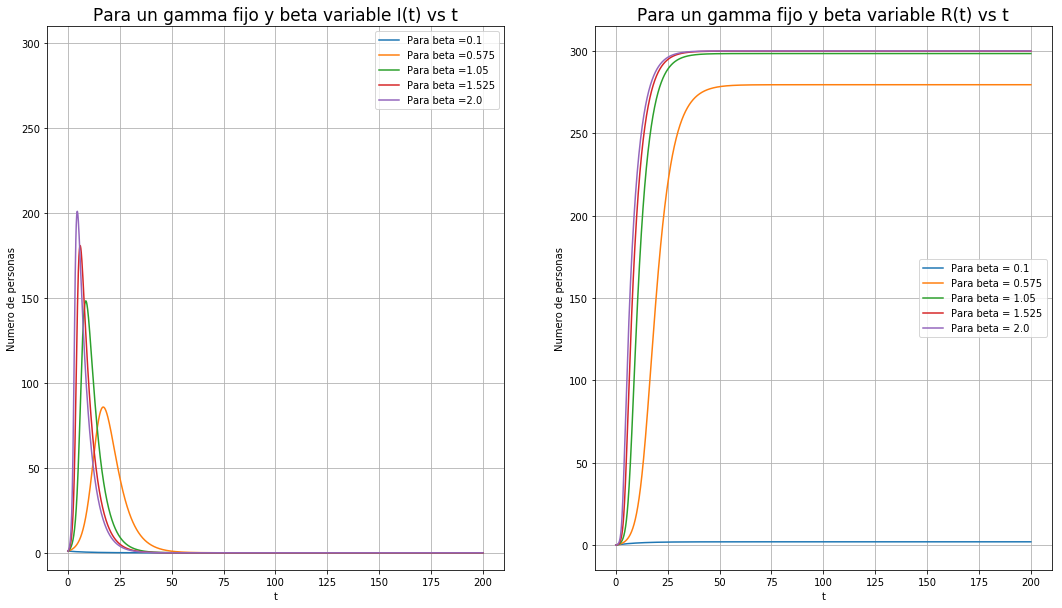

In [27]:
# Parameters
N = 300
beta = 0.3
gama = 0.2
beta1 = np.linspace(0.1,2,5)


# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y0 = [299, 1, 0] # Initial conditions

t = np.linspace(0, 200, 2000) # Step


plt.figure(figsize=(18,10))
for i in beta1:
    sol = odeint(f, y0, t, args=(N,i,gama)) # Solution
    plt.subplot(121)
    plt.title("Para un gamma fijo y beta variable I(t) vs t",fontsize=17)
    plt.plot(t,sol[:, 1], label='Para beta =%s'%i)
    plt.ylim(-10,310)
    plt.xlabel('t')
    plt.ylabel('Numero de personas')
    plt.grid()
    plt.legend()
    
    plt.subplot(122)
    plt.title("Para un gamma fijo y beta variable R(t) vs t",fontsize=17)
    plt.plot(t,sol[:, 2], label='Para beta = %s'%i)
    plt.xlabel('t')
    plt.ylabel('Numero de personas')
    plt.legend()
    plt.grid()
#plt.plot(t, sol[:, 0], 'b')
#plt.plot(t, sol[:, 1], 'r')
#plt.plot(t, sol[:, 2], 'g')

plt.show()

Para una población de 300 personas:

Se puede observar que la curva de los infectados aumenta mucho más rápido entre más grande es el parámetro $\beta$. Para valores muy grandes, no se nota este aumento ya que alcanza el máximo en un tiempo muy corto. Podemos ver que en 0.1 no hay más infectados, por lo que la curva cae inmediatamente a cero.

Para la curva de los recuperados, se puede observar que entre más grande es el valor de $\beta$, más rápido la curva llega a su valor máximo y por lo tanto a estabilizarse (como hay más infectados en poco tiempo, hay más recuperados en poco tiempo). También se puede notar que hay una pequeña diferencia entre el valor máximo que toma la curva para $\beta = 0.575$ con respecto a los demás, ya que para los otros dos valores ($\beta = 1.05$, $\beta = 1.525$ y $\beta = 2.0$) el valor máximo es apróximadamente 300. Para $\beta = 0.1$ se puede ver que la curva crece mínimamente y se estabiliza rápidamente (como solo hay un infectado, solo hay un recuperado). 

Por lo tanto para valores muy pequeños de $\beta$ ($\beta$ < 0.1) no tiene mucho sentido el modelo de SIR.

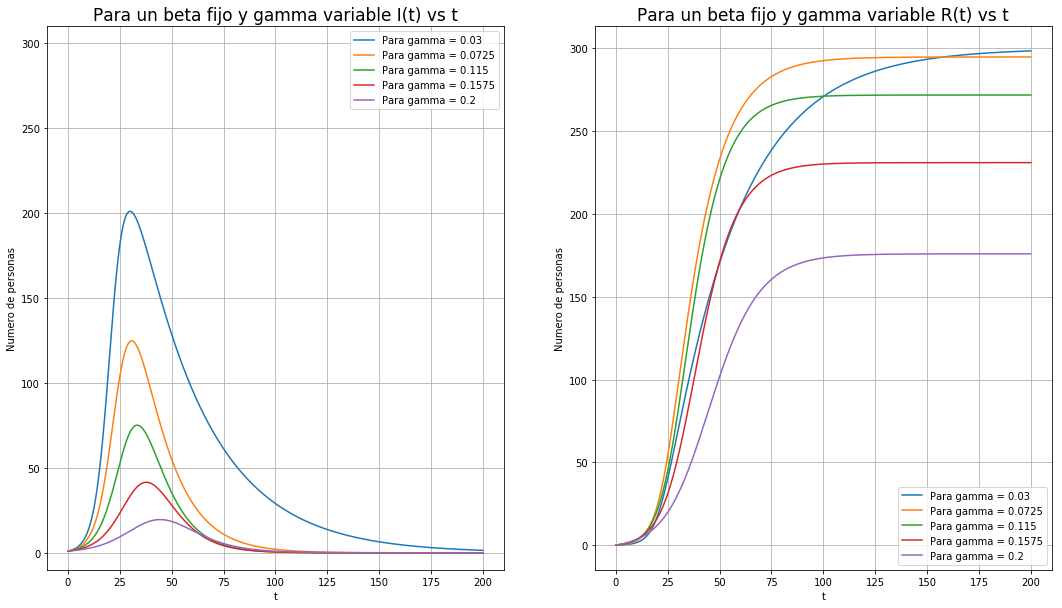

In [21]:
#Analogamente para gama
N = 300
gama1 = np.linspace(0.03,0.2,5)

# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y0 = [299, 1,0] # Initial conditions

t = np.linspace(0, 200, 2000) # Step

plt.figure(figsize=(18,10))
for i in gama1:
    sol = odeint(f, y0, t, args=(N,beta,i)) # Solution
    plt.subplot(121)
    plt.title("Para un beta fijo y gamma variable I(t) vs t",fontsize=17)
    plt.plot(t,sol[:, 1], label='Para gamma = %s'%i)
    plt.ylim(-10,310)
    plt.xlabel('t')
    plt.ylabel('Numero de personas')
    plt.grid()
    plt.legend()
    
    plt.subplot(122)
    plt.title("Para un beta fijo y gamma variable R(t) vs t",fontsize=17)
    plt.plot(t,sol[:, 2], label='Para gamma = %s'%i)
    plt.xlabel('t')
    plt.ylabel('Numero de personas')
    plt.legend()
    plt.grid()

Para una población de 300 personas:

Se puede observar que la curva de infectados, entre menor sea el gama, más grande es el máximo de la curva, es decir, hay un mayor número máximo de infectados entre menor es el gama. Este máximo, se alcanza más rápido entre menor sea el gama, pero no hay una diferencia muy importante. Para valores mayores a 0.2, la curva de infectados tiende inmediatamente a cero.

En la curva de recuperados, se puede notar que entre menor es el gama, más grande es el número de recuperados. También se puede observar que se alcanza el número máximo de recuperados, que tiende a estabilizarse, en un tiempo menor, aúnque tampoco es tan notable esta diferencia. Para gama con valores mayores a 0.2, la curva alcanza su máximo valor y se estabiliza rápidamente, pero este valor es muy pequeño.

Por lo tanto, para valores mayores a $\gamma = 0.2$, no es muy útil el modelo de SIR

## Si se aumenta el número total de personas N
Si se aumenta la población total, el comportamiento de las curvas respecto a los parámetros gama y beta es bastante similar, por lo que en principio este parámetro no debe afectar el comportamiento del modelo

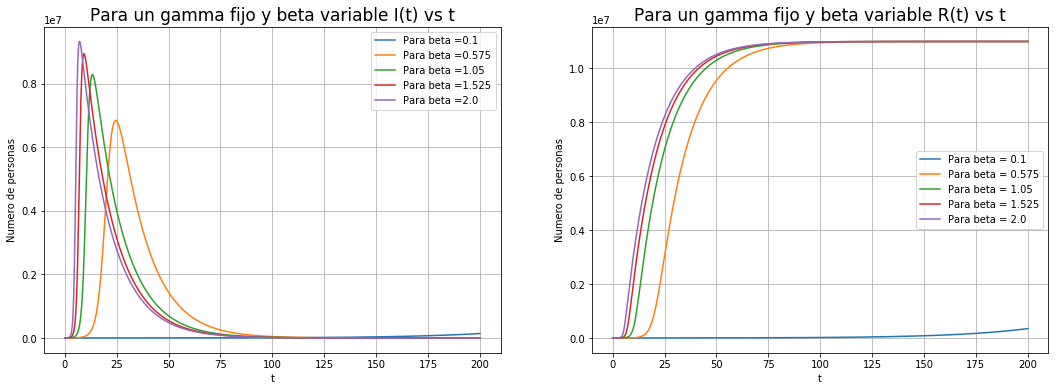

In [22]:
# Parameters
N = 11e6
beta = 0.3
gama = 0.07
beta1 = np.linspace(0.1,2,5)


# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

#y0 = [299, 1, 0] # Initial conditions

y0 = [N - I[0] - R[0], I[0],R[0]]

t = np.linspace(0, 200, 2000) # Step


plt.figure(figsize=(18,6))
for i in beta1:
    sol = odeint(f, y0, t, args=(N,i,gama)) # Solution
    plt.subplot(121)
    plt.title("Para un gamma fijo y beta variable I(t) vs t",fontsize=17)
    plt.plot(t,sol[:, 1], label='Para beta =%s'%i)
    #plt.ylim(-10,310)
    plt.xlabel('t')
    plt.ylabel('Numero de personas')
    plt.grid()
    plt.legend()
    
    plt.subplot(122)
    plt.title("Para un gamma fijo y beta variable R(t) vs t",fontsize=17)
    plt.plot(t,sol[:, 2], label='Para beta = %s'%i)
    plt.xlabel('t')
    plt.ylabel('Numero de personas')
    plt.legend()
    plt.grid()
#plt.plot(t, sol[:, 0], 'b')
#plt.plot(t, sol[:, 1], 'r')
#plt.plot(t, sol[:, 2], 'g')

plt.show()

# Ajuste para los datos de COVID-19 en la provincia de Hubei 

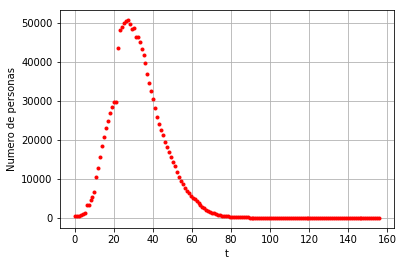

In [23]:
Confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
Deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
Recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

R = np.array(Deaths.iloc[62,4:]) + np.array(Recovered.iloc[53,4:])
I = np.array(Confirmed.iloc[62,4:]) - R

t = np.linspace(0,len(I),len(I))

plt.plot(t, I,'o', color='r',ms = 3)
plt.xlabel('t')
plt.ylabel('Numero de personas')
#plt.plot(t, R,'o', color='g', ms = 3)
plt.grid()
plt.show()


In [24]:
N = 58e6 # Hubei population

#Parametros
beta = np.linspace(2.0,4.3,100) #Amplitud primer sin
gama = np.linspace(2.0,4.3,100) #Amplitud segundo sin

z = itertools.product(beta,gama)


y0 = [N - I[0] - R[0], I[0],R[0]] # Initial conditions
t = np.linspace(0,156,156)

def Model(y,t,N,beta,gama):
    
    def f(y, t, N, beta,gama):
        S, I, R = y
        dydt = [-beta*S*I/N,(beta*S*I/N) - gama*I, gama*I]
        return dydt

    sol = odeint(f, y, t, args=(N,beta,gama)) # Solution

    
    return(sol)

minimo = []
chi2 =[]
for i in list(z):
    xmod = Model(y0,t,N,i[0],i[1])[:,1]
    suma = 0
               
    for h in range(len(t)):
        chi = ((I[h] - xmod[h])**(2))/(abs(xmod[h]))
        suma+=chi
    chi2.append(suma)
    if suma<=min(chi2): #para el valor minimo de chi**2
        minimo = []
        minimo.append([suma,i])

In [29]:
arr = minimo[0][1]
print (arr)
min(chi2)/len(I)

(4.0212121212121215, 3.8353535353535353)


3575.1424546118619

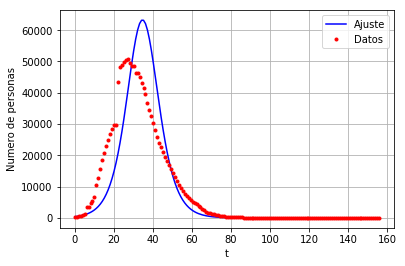

In [26]:
Ifit = Model(y0,t,N,arr[0],arr[1])[:,1]
Rfit = Model(y0,t,N,arr[0],arr[1])[:,2]

plt.plot(t,Ifit,'b',label='Ajuste')
plt.plot(t, I,'o', color='r',ms = 3,label='Datos')
plt.grid()
plt.xlabel('t')
plt.ylabel('Numero de personas')
plt.legend(loc='best')
plt.show()


## Conclusiones

-El método de Runge-Kutta es un método de mayor exactitud que el método de Euler, esto se puede notar en la comparación entre ambos métodos con el método de odeint, el cual se conoce como solución más cerca a la exacta. También se puede ver en la convergencia que el método de Runge-Kutta tiende a cero más rápidamente que el método de Euler.

-Como se observa en la variación de los parámetros $\gamma$ y $\beta$. Para $\beta > 0.1$ no tiene sentido el modelo SIR. Igualmente para valores de gamma muy grandes, osea $\gamma > 0.2$

-El ajuste obtenido con el método de $\chi^2$ no fue óptimo para este sistema de ecuaciones diferenciales para los datos de infectados por Covid 19 en la provincia de Hubei. El $\chi^2$ mínimo dividido el número de grados de libertad, da como resultado un valor muy grande, y esto se puede notar gráficamente.